In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC


In [2]:
#load the data
test_df = pd.read_csv("/Users/pemawangmo/Desktop/DS_Notes/MACHINE_LEARNING/dataset/titanic/test.csv")
train_df = pd.read_csv("/Users/pemawangmo/Desktop/DS_Notes/MACHINE_LEARNING/dataset/titanic/train.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(891, 12)

# Data Exploration/Analysis


In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


name, sex, ticket, cabin , embarked are categorical features which needs to be converted to numerical.

In [6]:
#to find missing values
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 687 of it are missing.

What features could contribute to a high survival rate ?

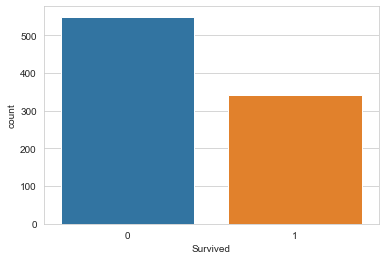

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_df)


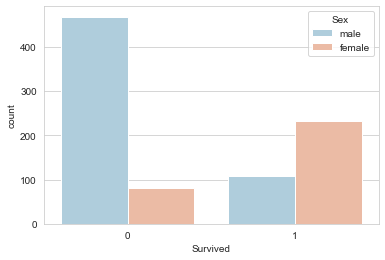

In [8]:
sns.countplot(x='Survived',data=train_df,hue='Sex',palette='RdBu_r')


It looks like people that did not survive were much more likely to be men. While those who survived were twice as likely to be female.



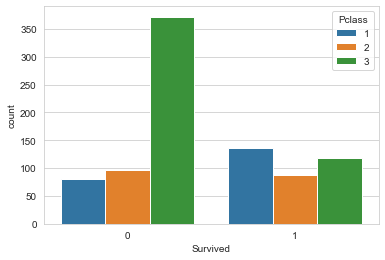

In [9]:
sns.countplot(x='Survived',data=train_df,hue='Pclass')


Also it looks like the people who did not survive were part of 3rd class. People that did survive were from the higher classes.



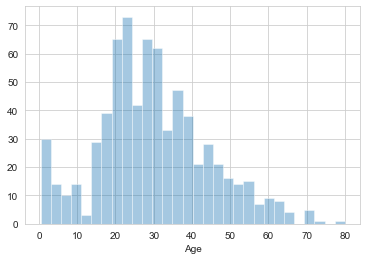

In [10]:
sns.distplot(train_df['Age'].dropna(),bins=30,kde=False)


there were quite a few young passengers between age 0 and 10. Then the average age tends to be around 20-30.



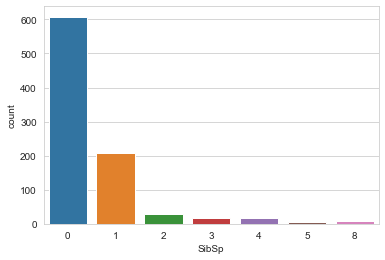

In [11]:
sns.countplot(x='SibSp',data=train_df)


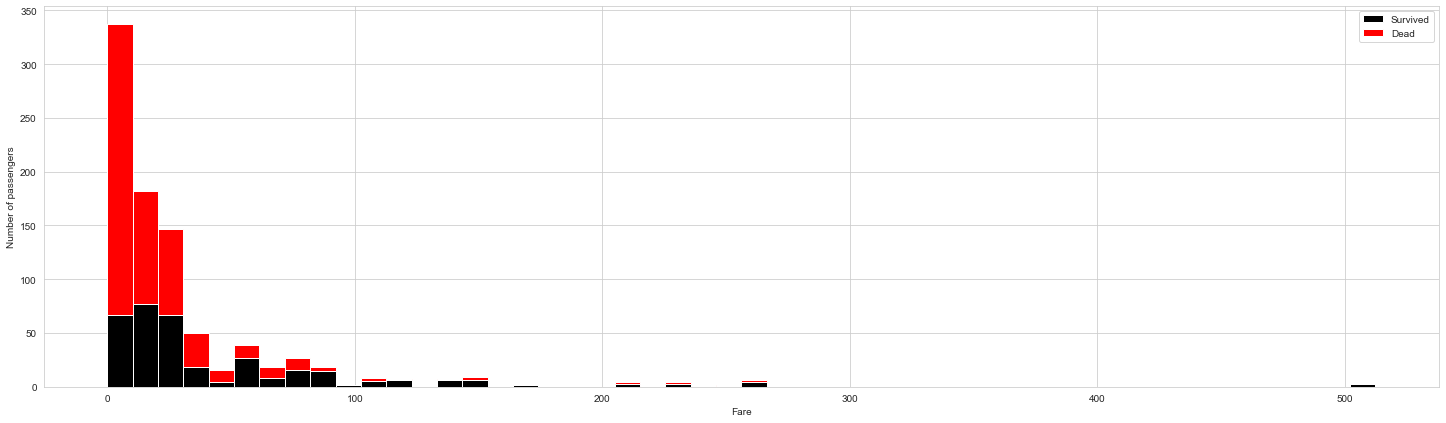

In [51]:
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Survived'] == 1]['Fare'], train_df[train_df['Survived'] == 0]['Fare']], 
         stacked=True, color = ['black','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();


# Cleaning Data

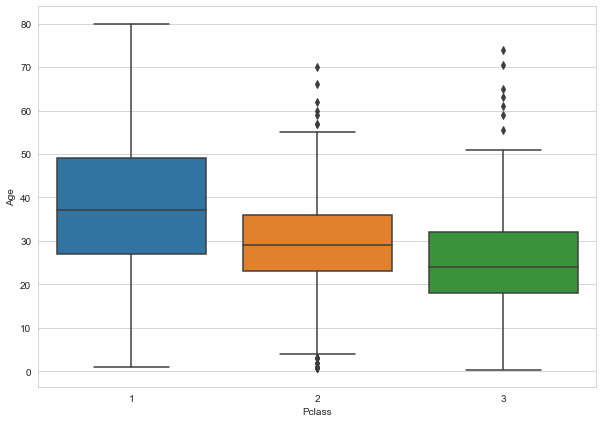

In [13]:
#filling values for age

plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train_df)

In [14]:
train_df.groupby('Pclass').mean()['Age'].round()


Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [15]:
mean_class1 = train_df.groupby('Pclass').mean()['Age'].round().loc[1]
mean_class2 = train_df.groupby('Pclass').mean()['Age'].round().loc[2]
mean_class3 = train_df.groupby('Pclass').mean()['Age'].round().loc[3]

In [16]:
train_df.loc[train_df['Pclass']==1,'Age'] = train_df.loc[train_df['Pclass']==1,'Age'].fillna(value=mean_class1)
train_df.loc[train_df['Pclass']==2,'Age'] = train_df.loc[train_df['Pclass']==2,'Age'].fillna(value=mean_class2)
train_df.loc[train_df['Pclass']==3,'Age'] = train_df.loc[train_df['Pclass']==3,'Age'].fillna(value=mean_class3)

In [17]:
train_df["Age"].isnull().sum()


0

In [18]:
#drop cabin features since more number of missing values
train_df.drop('Cabin',axis=1,inplace=True)


In [19]:
#dropping missing values of embarked values
train_df.dropna(inplace=True) 

In [20]:
#checking again for missing values
train_df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
#changing to numerical values

train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [22]:
#Convert ‘Sex’ feature into numeric.

genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [23]:
train_df['Ticket'].describe()


count          889
unique         680
top       CA. 2343
freq             7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [24]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [25]:
#Convert ‘Embarked’ feature into numeric.

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

since name feature also doesn't make good sense in predicting survival rate, we will drop it

In [26]:

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [27]:
train_df.drop('PassengerId',axis=1,inplace=True)


In [28]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int64
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [29]:
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


Similiar cleaning on test set also

In [30]:
#filling missing Age feature

test_df.loc[test_df['Pclass']==1,'Age'] = test_df.loc[test_df['Pclass']==1,'Age'].fillna(value=mean_class1)
test_df.loc[test_df['Pclass']==2,'Age'] = test_df.loc[test_df['Pclass']==2,'Age'].fillna(value=mean_class2)
test_df.loc[test_df['Pclass']==3,'Age'] = test_df.loc[test_df['Pclass']==3,'Age'].fillna(value=mean_class3)

In [31]:
test_df["Age"].isnull().sum()


0

In [32]:
#drop cabin feature
test_df.drop('Cabin',axis=1,inplace=True)


In [33]:
#dropping the missing value for embarked feature
test_df.dropna(inplace=True)


In [34]:
#check missing values
test_df.isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [35]:
#changing to numerical features

test_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Sex            417 non-null int64
Age            417 non-null float64
SibSp          417 non-null int64
Parch          417 non-null int64
Fare           417 non-null float64
Embarked       417 non-null int64
dtypes: float64(2), int64(6)
memory usage: 29.3 KB


In [36]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


# Build Model

In [37]:
X = train_df.drop('Survived',axis=1)
y = train_df['Survived']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [39]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [40]:
logreg.score(X_train,y_train)


0.8054662379421221

In [41]:
logreg.score(X_test,y_test)


0.8314606741573034

# Making Prediction

In [42]:
test_x = test_df.drop('PassengerId',axis=1)


In [43]:
predictions = logreg.predict(test_x)


In [44]:
final_prediction = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':predictions})


In [45]:
final_prediction.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [46]:
final_prediction.to_csv("titanic_prediction.csv", index=False)